# Análise Exploratória - Casos de Dengue (2010-2024)
Este notebook apresenta a análise exploratória dos dados de dengue para as capitais Belo Horizonte, Rio de Janeiro, Vitória e São Paulo.

In [21]:
import numpy as np


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



In [ ]:

# load
files = {
    'Belo Horizonte': './base/dengue_52-1-belo-horizonte.csv',
    'Rio de Janeiro': './base/dengue_52-1-rio de janeiro.csv',
    'Vitória': './base/dengue_52-1-vitoria.csv',
    'São Paulo': './base/dengue_52-Sao-paulo.csv'
}
dfs = []
for city, path in files.items():
    df = pd.read_csv(path, parse_dates=['data_iniSE'])
    df['cidade'] = city
    dfs.append(df)
data = pd.concat(dfs).sort_values(['cidade', 'data_iniSE'])

In [24]:
display(data.head())
data.info()

,data_iniSE,SE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,...,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year,cidade
782,2010-01-03,201001,339.0,339,339.0,339,0.0,13.444037,0,1,...,47.285714,25.230602,29.714286,339.0,NaN,NaN,NaN,NaN,1086709,Belo Horizonte
781,2010-01-10,201002,490.0,490,490.0,490,0.0,19.432384,0,1,...,44.000000,26.232493,30.857143,490.0,NaN,NaN,NaN,NaN,1086709,Belo Horizonte
780,2010-01-17,201003,587.0,587,587.0,587,0.0,23.279203,0,2,...,44.000000,25.621849,30.857143,587.0,NaN,NaN,NaN,NaN,1086709,Belo Horizonte
779,2010-01-24,201004,903.0,903,903.0,903,0.0,35.811108,0,2,...,48.000000,25.070904,29.000000,903.0,NaN,NaN,NaN,NaN,1086709,Belo Horizonte
778,2010-01-31,201005,1140.0,1140,1140.0,1140,0.0,45.210037,0,4,...,40.714286,26.349790,30.142857,1140.0,NaN,NaN,NaN,NaN,1086709,Belo Horizonte


<class 'pandas.core.frame.DataFrame'>
Index: 3132 entries, 782 to 0
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_iniSE        3132 non-null   datetime64[ns]
 1   SE                3132 non-null   int64         
 2   casos_est         3132 non-null   float64       
 3   casos_est_min     3132 non-null   int64         
 4   casos_est_max     3060 non-null   float64       
 5   casos             3132 non-null   int64         
 6   p_rt1             3132 non-null   float64       
 7   p_inc100k         3132 non-null   float64       
 8   Localidade_id     3132 non-null   int64         
 9   nivel             3132 non-null   int64         
 10  id                3132 non-null   int64         
 11  versao_modelo     3132 non-null   object        
 12  tweet             2812 non-null   float64       
 13  Rt                3132 non-null   float64       
 14  pop               3132 non-nul

In [25]:

missing = data.isnull().sum()
display(missing)

data_iniSE             0
SE                     0
casos_est              0
casos_est_min          0
casos_est_max         72
casos                  0
p_rt1                  0
p_inc100k              0
Localidade_id          0
nivel                  0
id                     0
versao_modelo          0
tweet                320
Rt                     0
pop                    0
tempmin                0
umidmax               58
receptivo              0
transmissao           15
nivel_inc              0
umidmed               58
umidmin               58
tempmed               58
tempmax               58
casprov                4
casprov_est         3132
casprov_est_min     3132
casprov_est_max     3132
casconf             3132
notif_accum_year       0
cidade                 0
dtype: int64

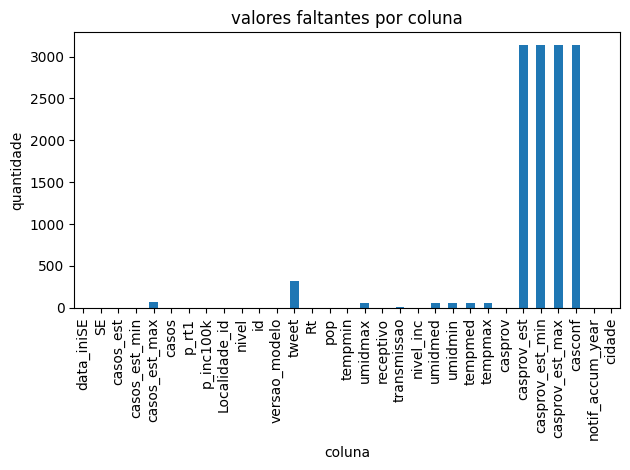

In [26]:
missing.plot.bar()
plt.title('valores faltantes por coluna')
plt.xlabel('coluna')
plt.ylabel('quantidade')
plt.tight_layout()
plt.show()


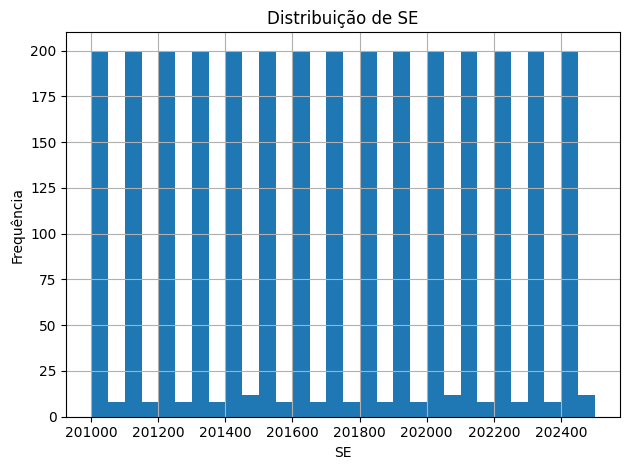

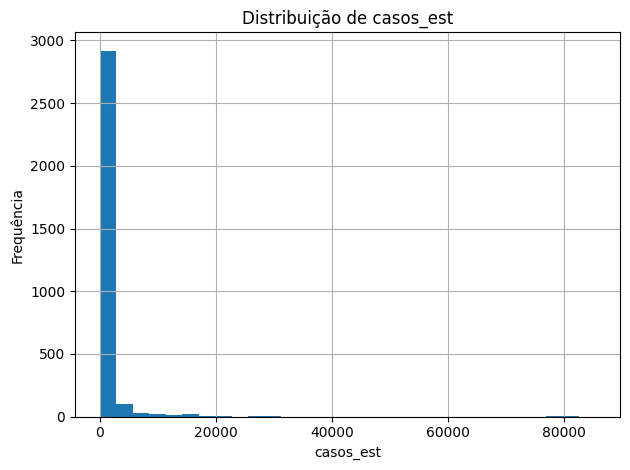

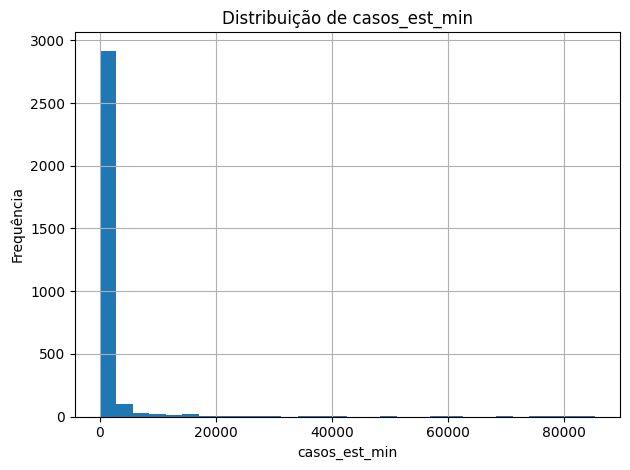

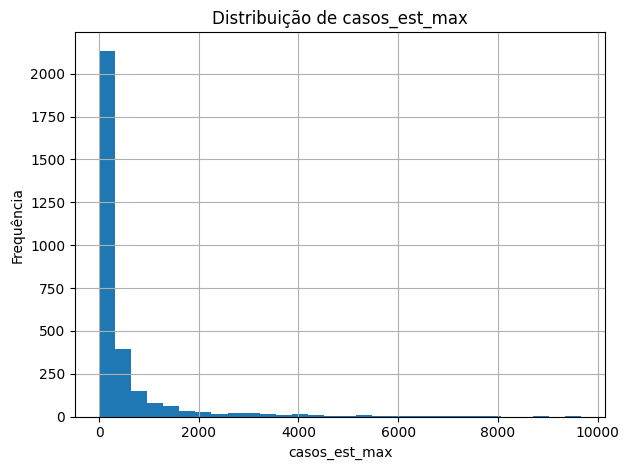

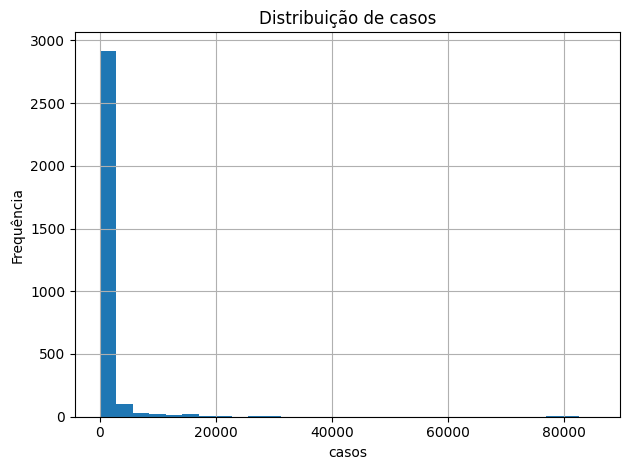

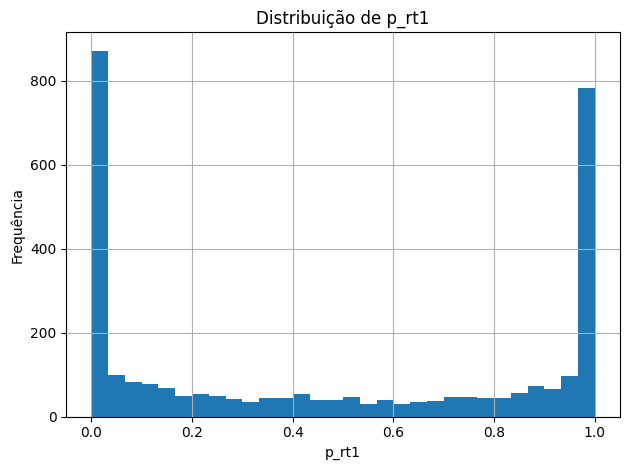

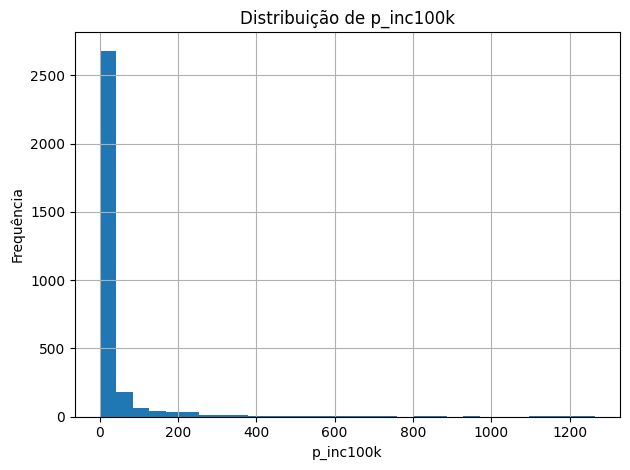

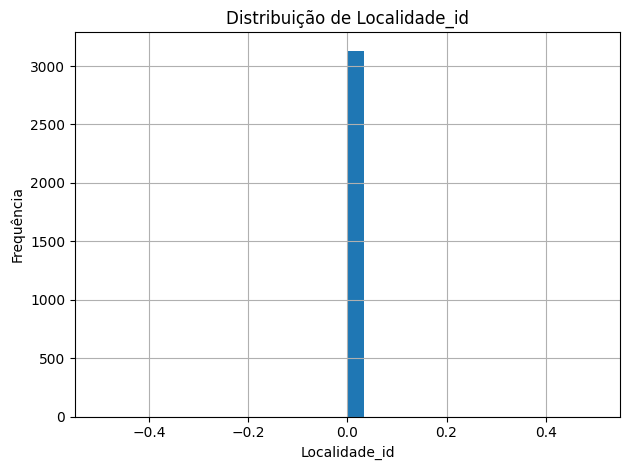

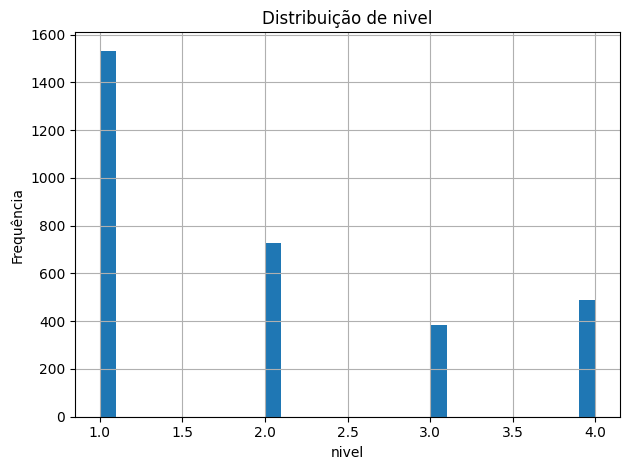

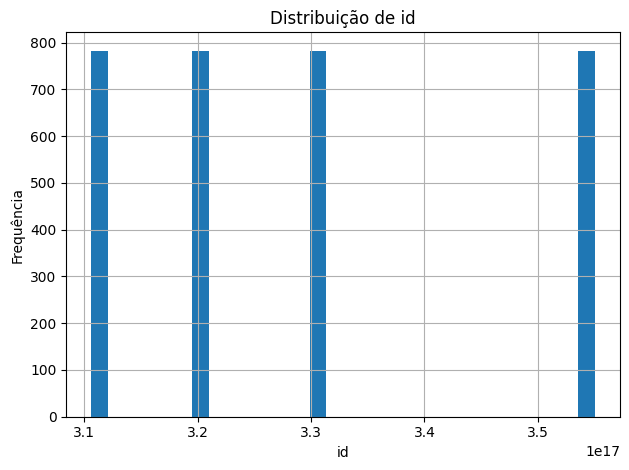

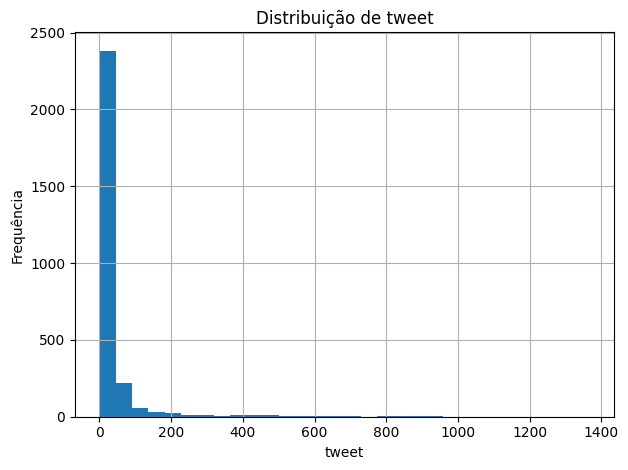

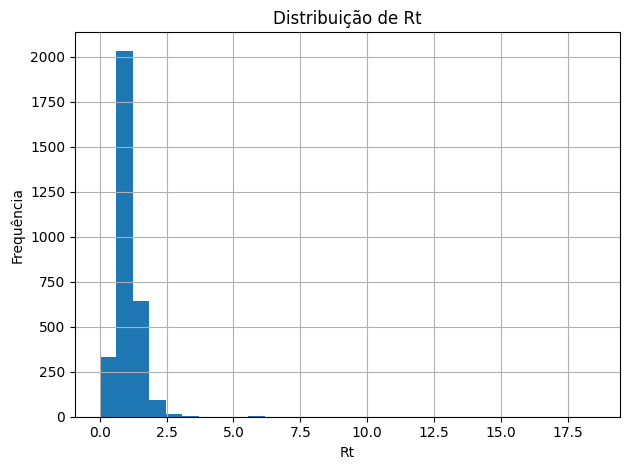

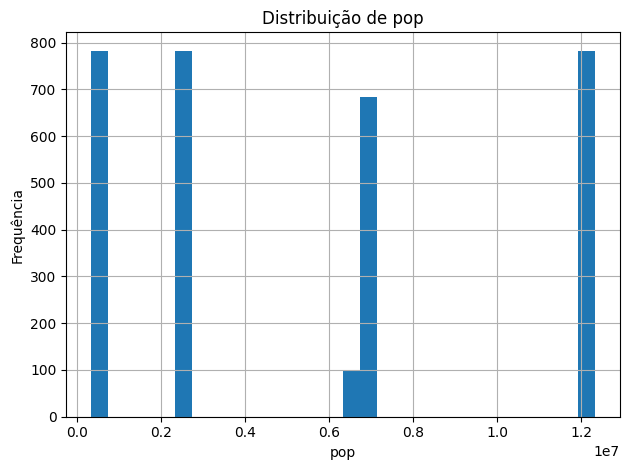

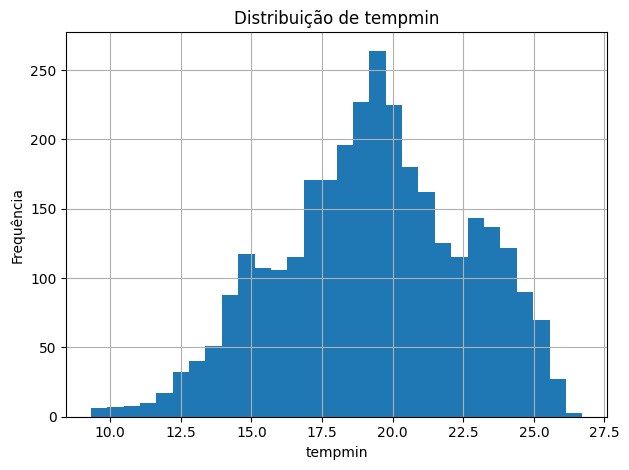

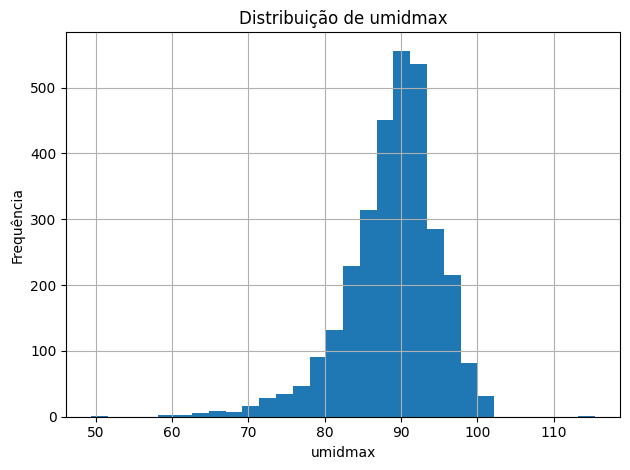

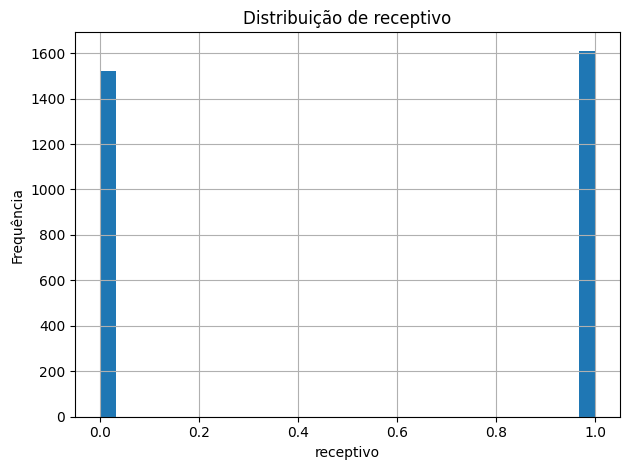

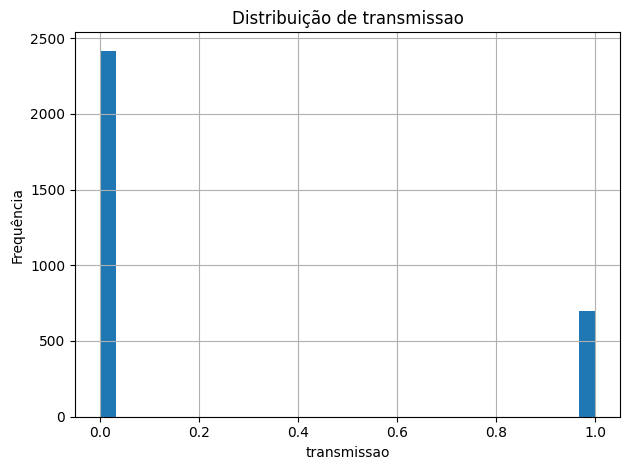

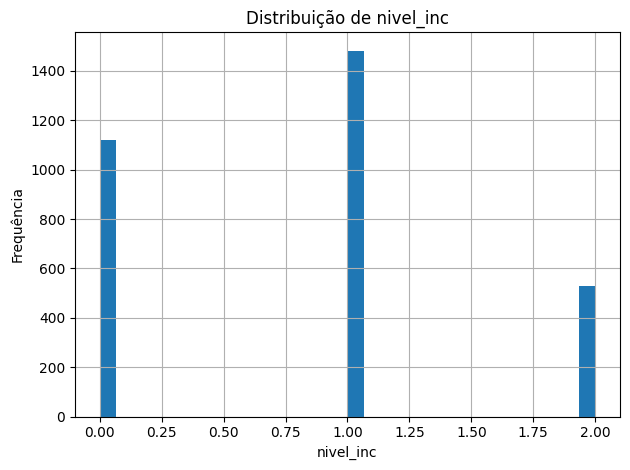

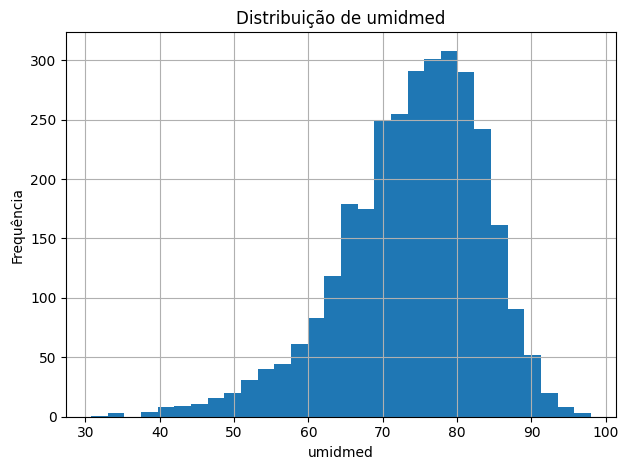

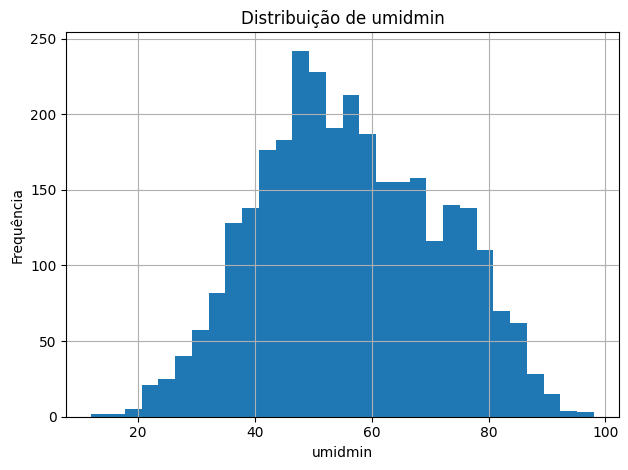

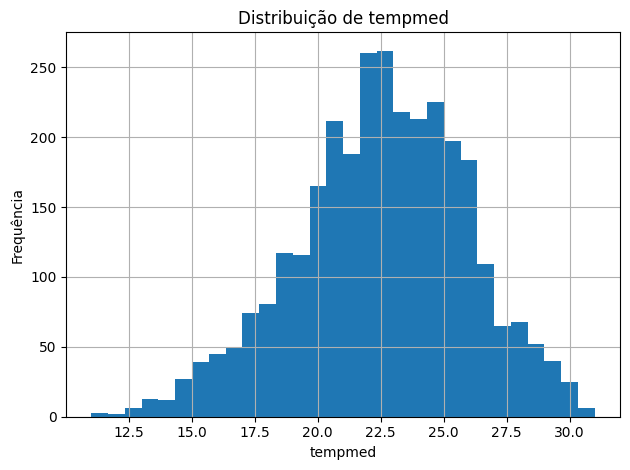

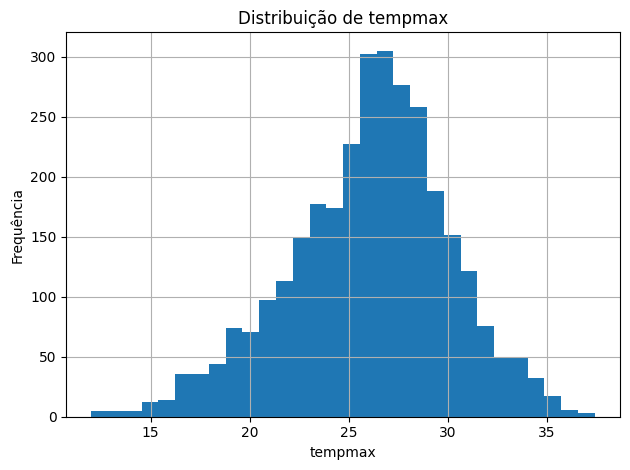

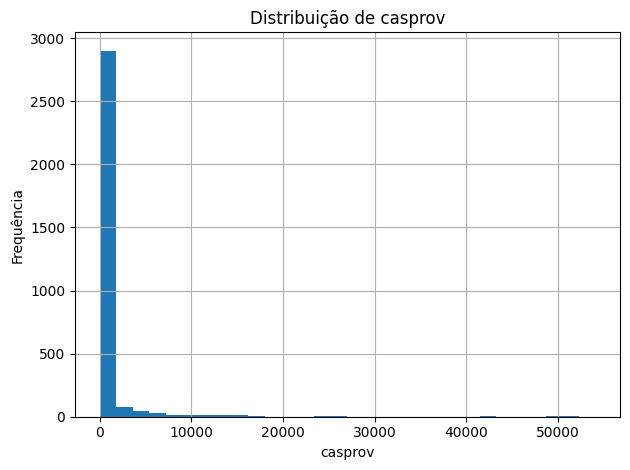

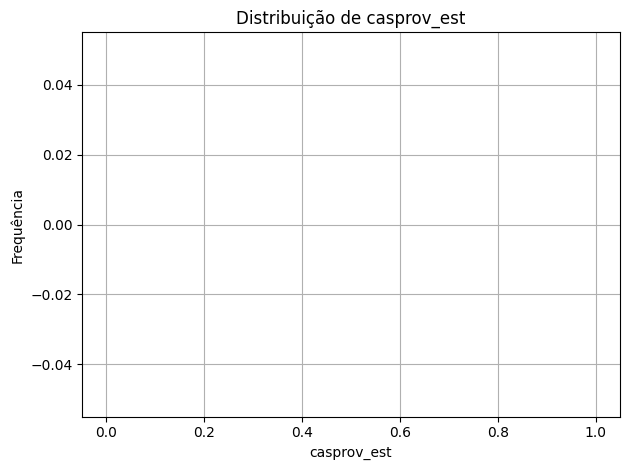

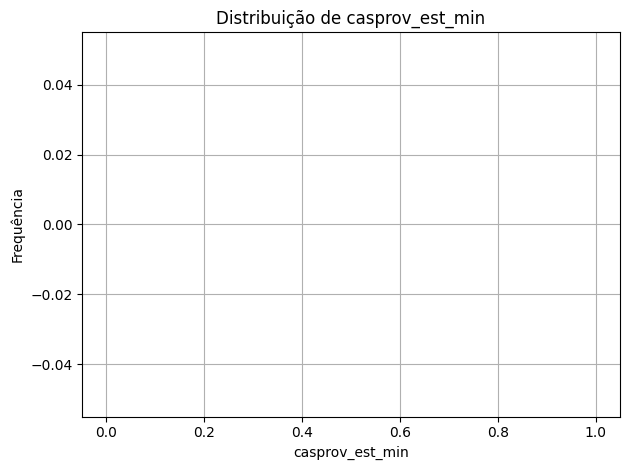

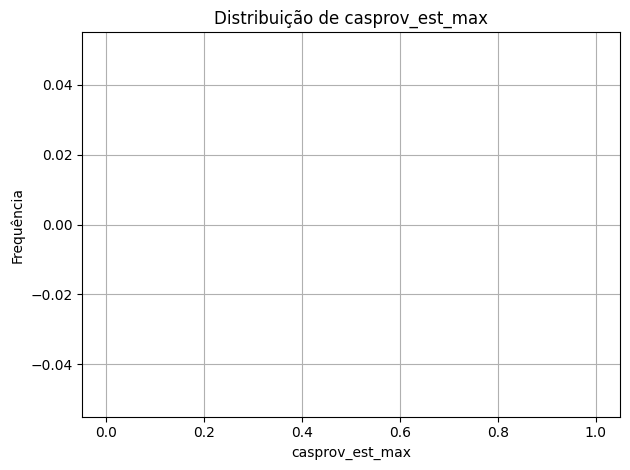

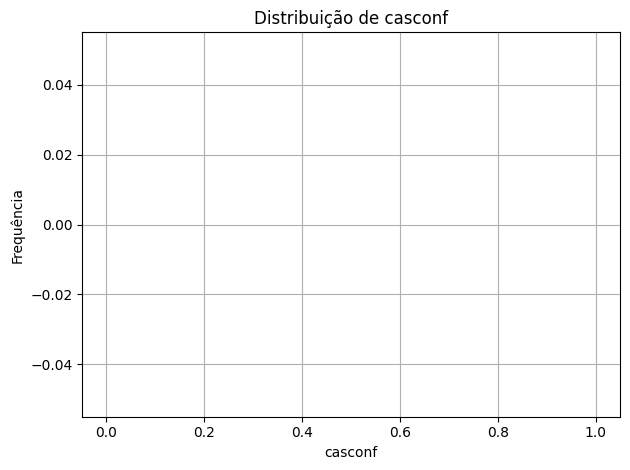

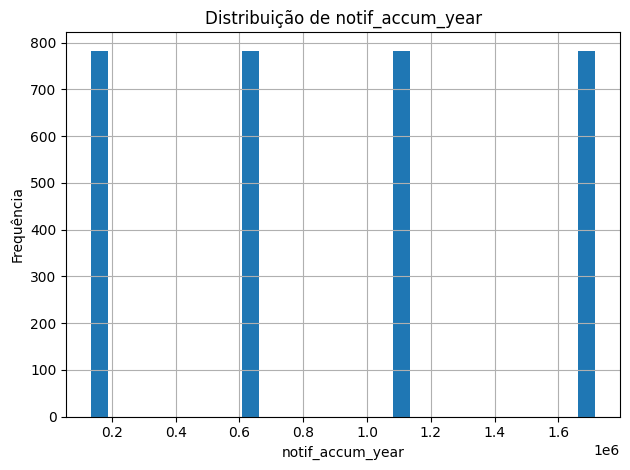

In [27]:
num_cols = data.select_dtypes(include=['number']).columns
for col in num_cols:
    plt.figure()
    data[col].hist(bins=30)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.show()

<Figure size 640x480 with 0 Axes>

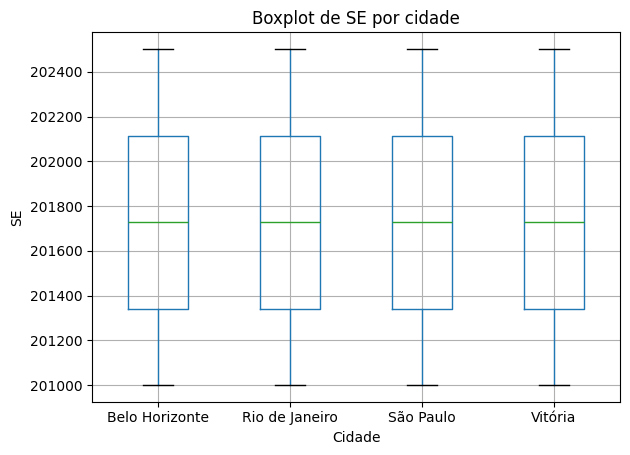

<Figure size 640x480 with 0 Axes>

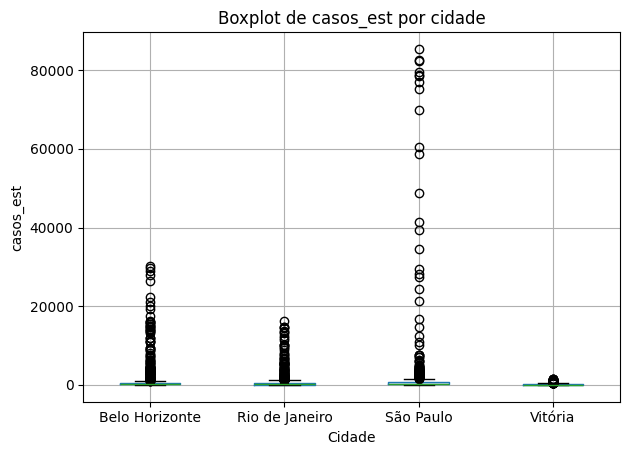

<Figure size 640x480 with 0 Axes>

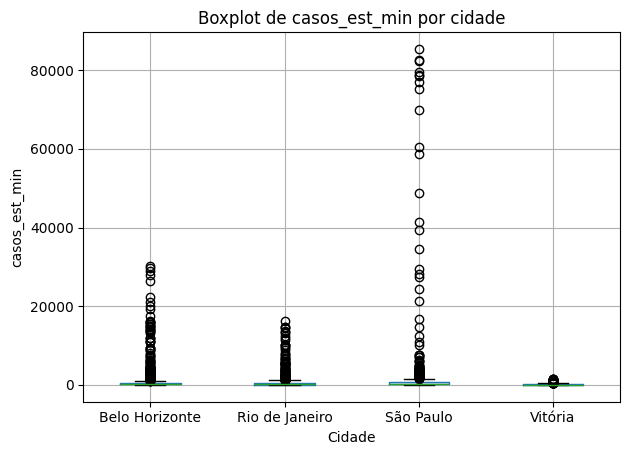

<Figure size 640x480 with 0 Axes>

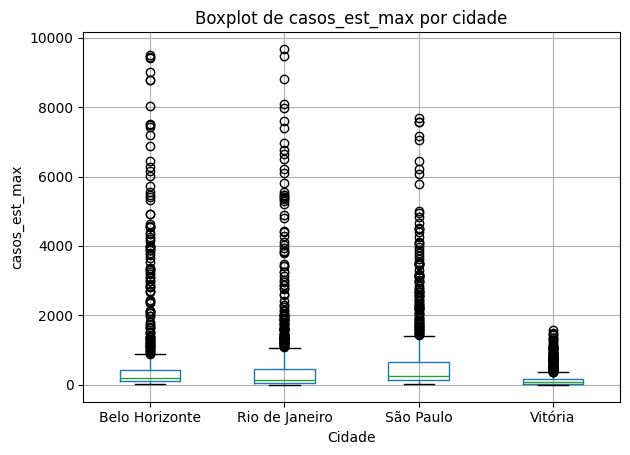

<Figure size 640x480 with 0 Axes>

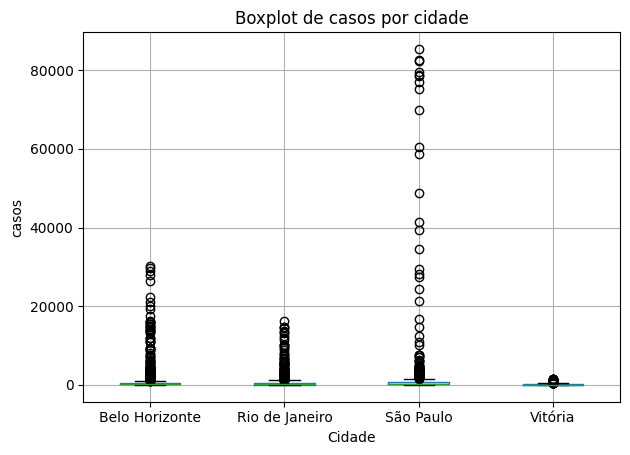

<Figure size 640x480 with 0 Axes>

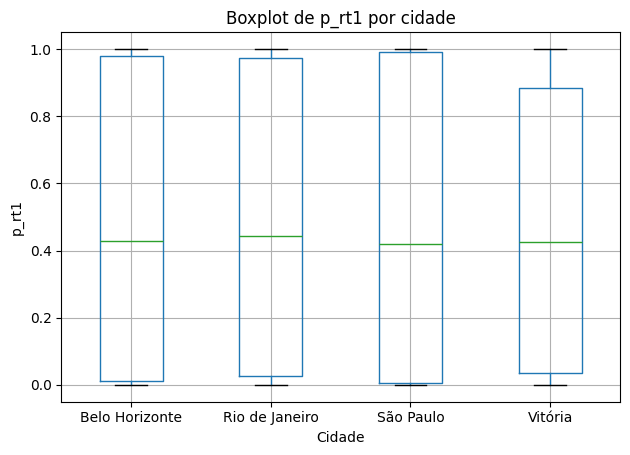

<Figure size 640x480 with 0 Axes>

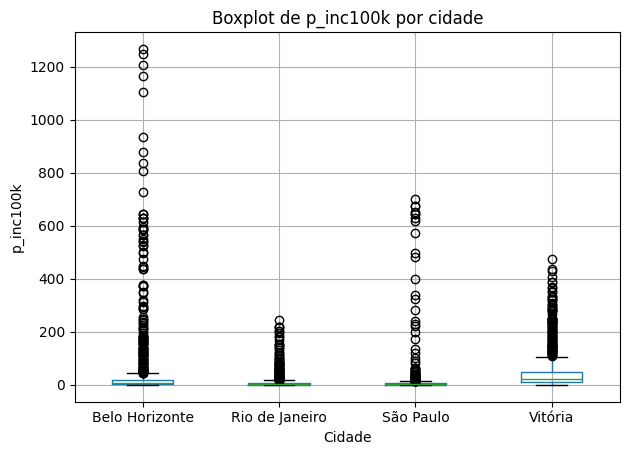

<Figure size 640x480 with 0 Axes>

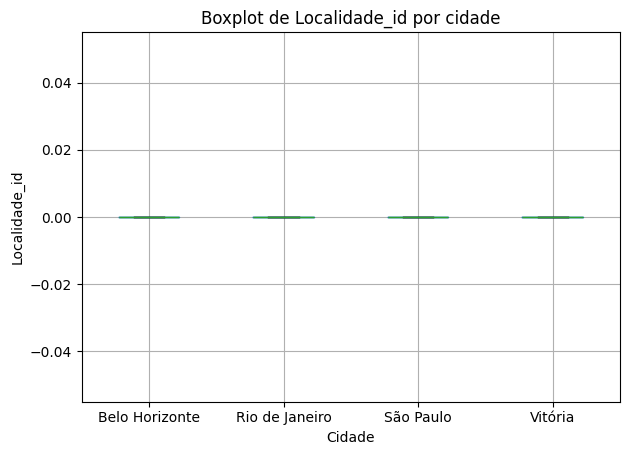

<Figure size 640x480 with 0 Axes>

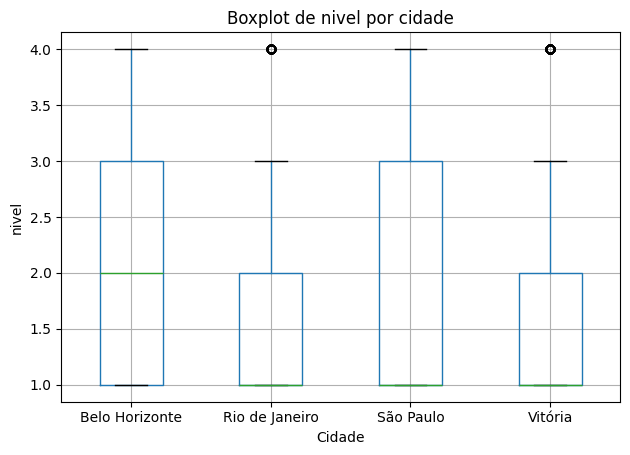

<Figure size 640x480 with 0 Axes>

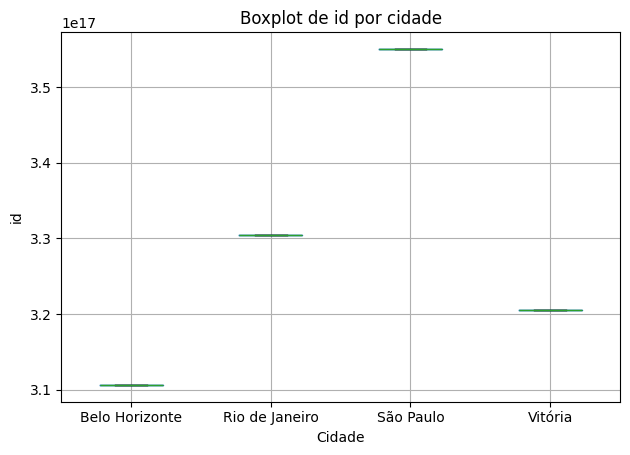

<Figure size 640x480 with 0 Axes>

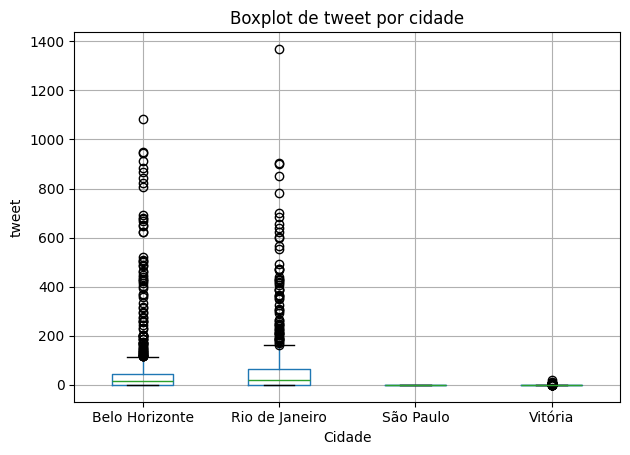

<Figure size 640x480 with 0 Axes>

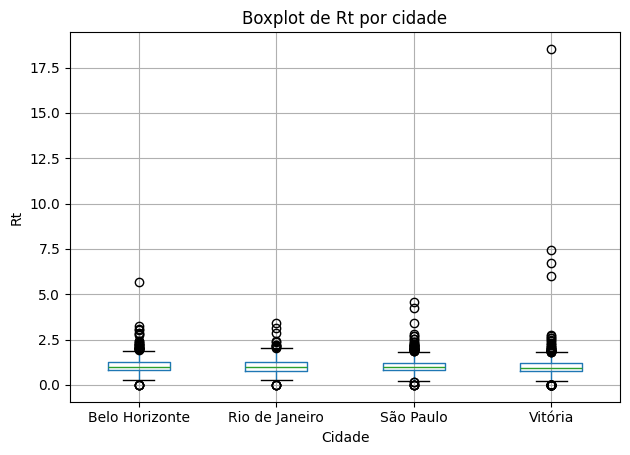

<Figure size 640x480 with 0 Axes>

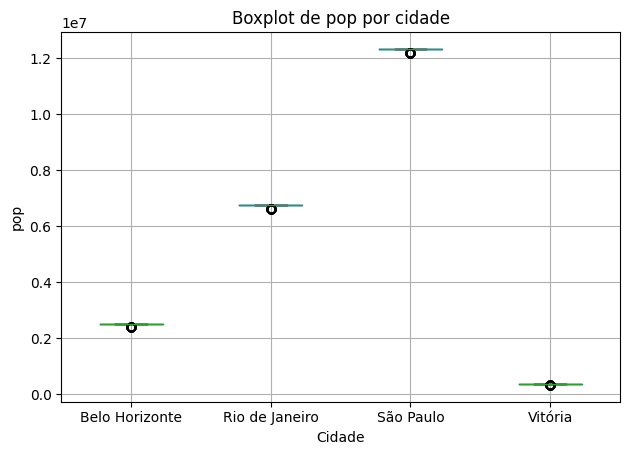

<Figure size 640x480 with 0 Axes>

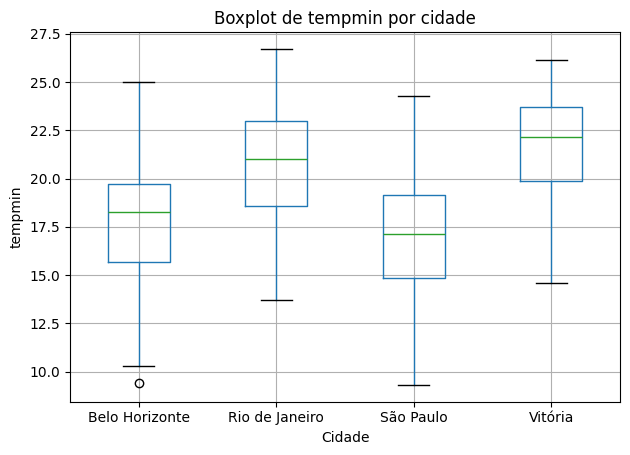

<Figure size 640x480 with 0 Axes>

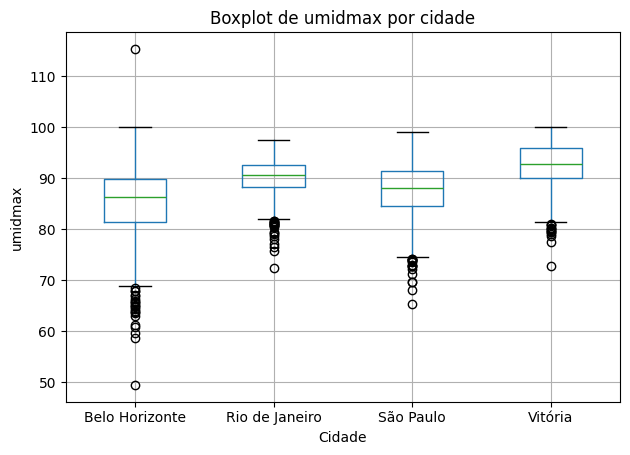

<Figure size 640x480 with 0 Axes>

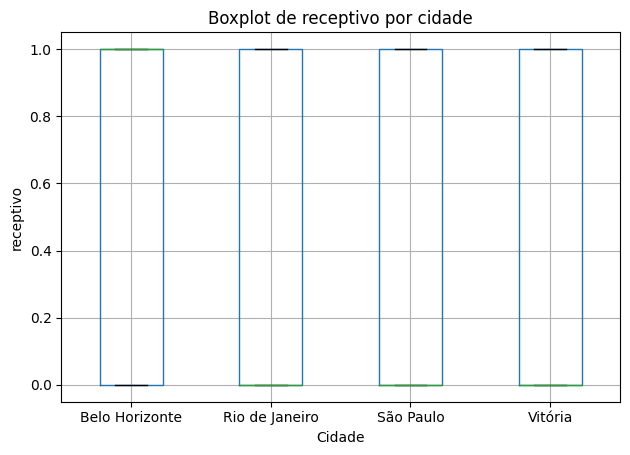

<Figure size 640x480 with 0 Axes>

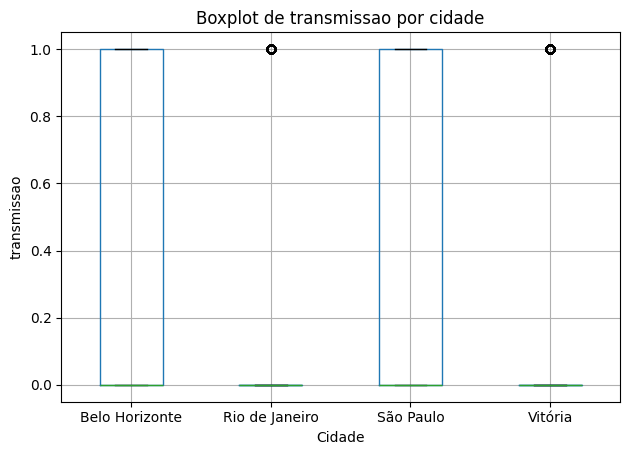

<Figure size 640x480 with 0 Axes>

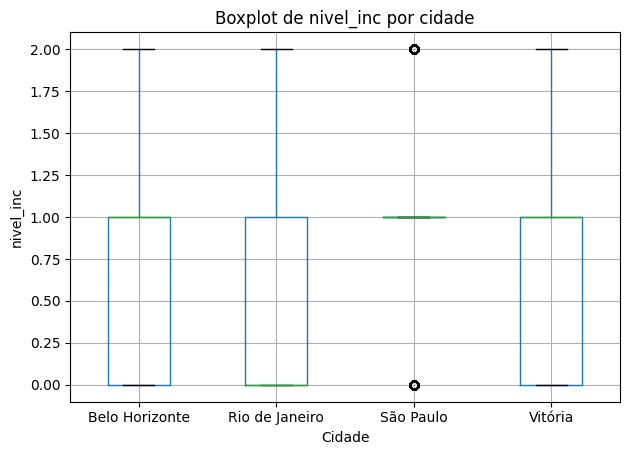

<Figure size 640x480 with 0 Axes>

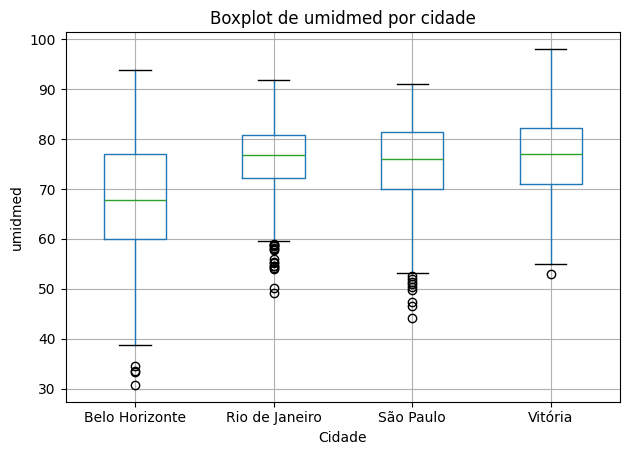

<Figure size 640x480 with 0 Axes>

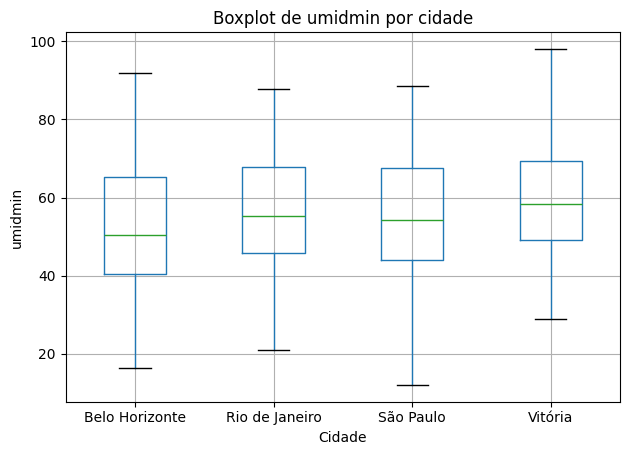

<Figure size 640x480 with 0 Axes>

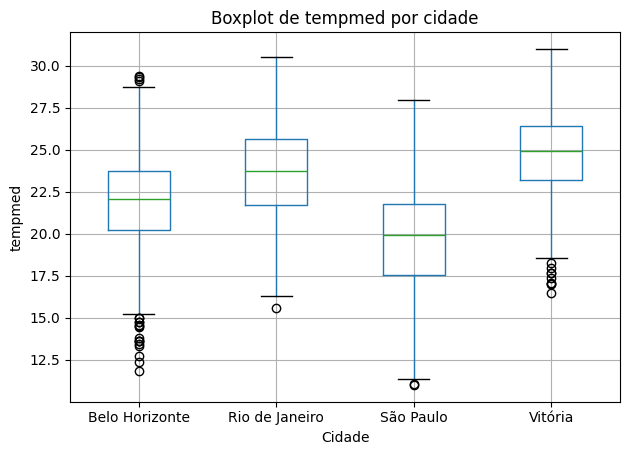

<Figure size 640x480 with 0 Axes>

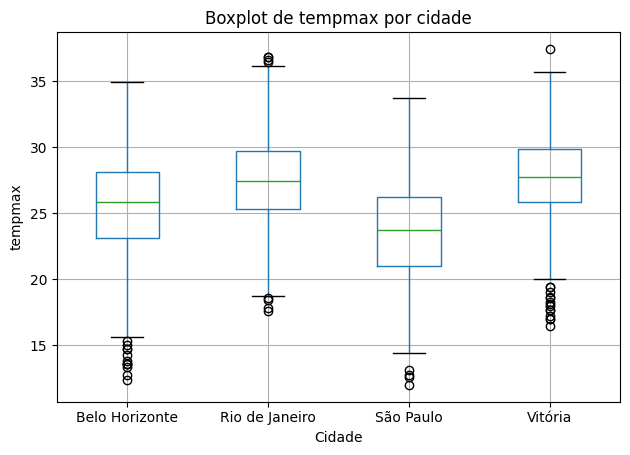

<Figure size 640x480 with 0 Axes>

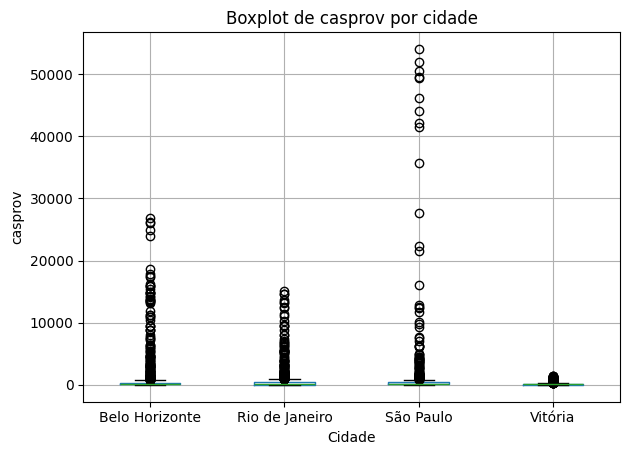

<Figure size 640x480 with 0 Axes>

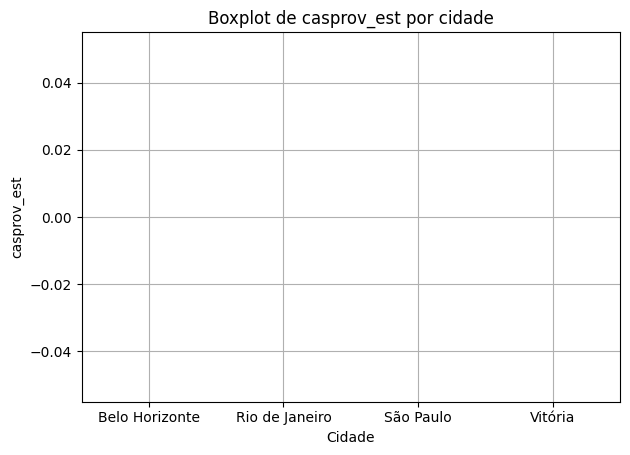

<Figure size 640x480 with 0 Axes>

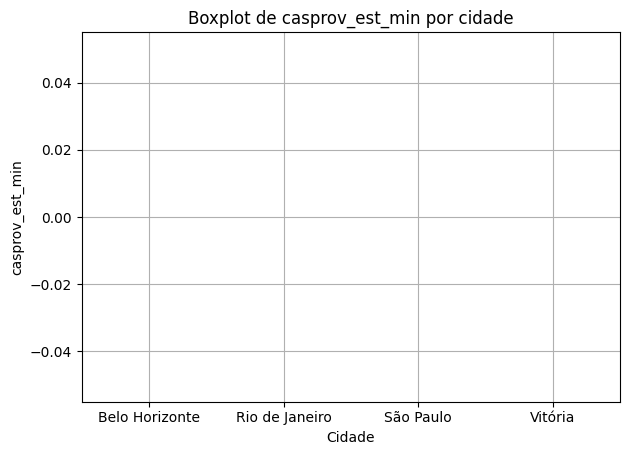

<Figure size 640x480 with 0 Axes>

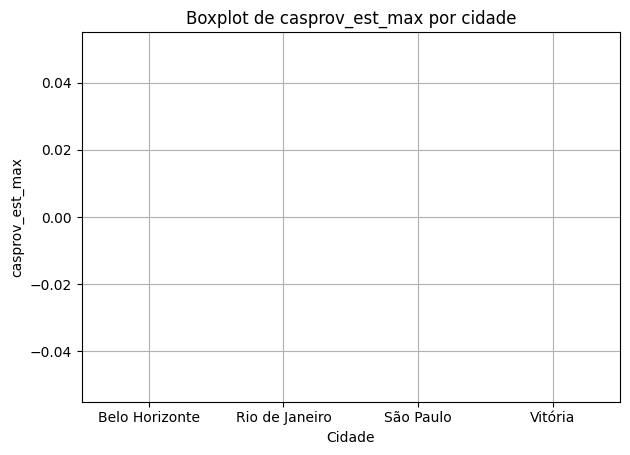

<Figure size 640x480 with 0 Axes>

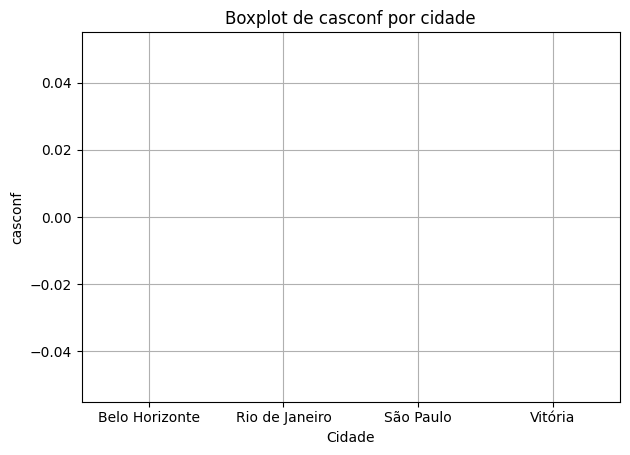

<Figure size 640x480 with 0 Axes>

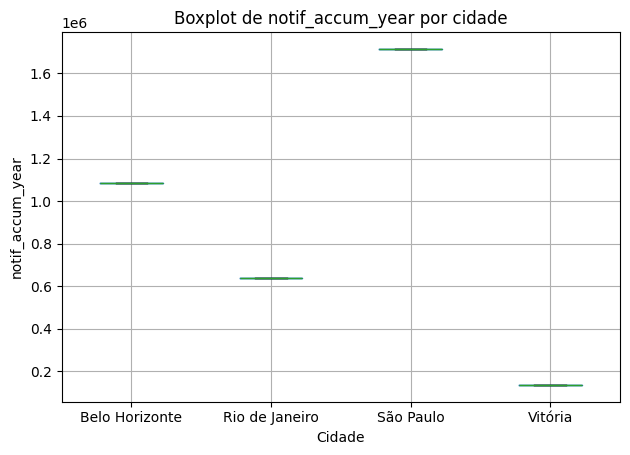

In [28]:
for col in num_cols:
    plt.figure()
    data.boxplot(column=col, by='cidade')
    plt.title(f'Boxplot de {col} por cidade')
    plt.suptitle('')
    plt.xlabel('Cidade')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


In [29]:
cols_needed = [
    'data_iniSE',  # data da semana epidemiológica
    'SE',          # número da semana
    'casos',       # variável alvo
    'casos_est',   # estimativa central
    'casos_est_min',
    'casos_est_max',
    'p_rt1',       # taxa de reporte
    'p_inc100k',   # incidência por 100k hab.
    'cidade'       # identificação de local
]
data = data[cols_needed]

In [33]:
display(data.head())
data.info()

,data_iniSE,SE,casos,casos_est,casos_est_min,casos_est_max,p_rt1,p_inc100k,cidade
782,2010-01-03,201001,339,339.0,339,339.0,0.0,13.444037,Belo Horizonte
781,2010-01-10,201002,490,490.0,490,490.0,0.0,19.432384,Belo Horizonte
780,2010-01-17,201003,587,587.0,587,587.0,0.0,23.279203,Belo Horizonte
779,2010-01-24,201004,903,903.0,903,903.0,0.0,35.811108,Belo Horizonte
778,2010-01-31,201005,1140,1140.0,1140,1140.0,0.0,45.210037,Belo Horizonte


<class 'pandas.core.frame.DataFrame'>
Index: 3132 entries, 782 to 0
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   data_iniSE     3132 non-null   datetime64[ns]
 1   SE             3132 non-null   int64         
 2   casos          3132 non-null   int64         
 3   casos_est      3132 non-null   float64       
 4   casos_est_min  3132 non-null   int64         
 5   casos_est_max  3060 non-null   float64       
 6   p_rt1          3132 non-null   float64       
 7   p_inc100k      3132 non-null   float64       
 8   cidade         3132 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 244.7+ KB
